In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/titanic_clean.csv')

In [3]:
df.sample(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
377,0,1,male,27.0,0,2,211.5000,C
471,0,3,male,38.0,0,0,8.6625,S
524,0,3,male,28.0,0,0,7.2292,C
540,1,1,female,36.0,0,2,71.0000,S


In [4]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

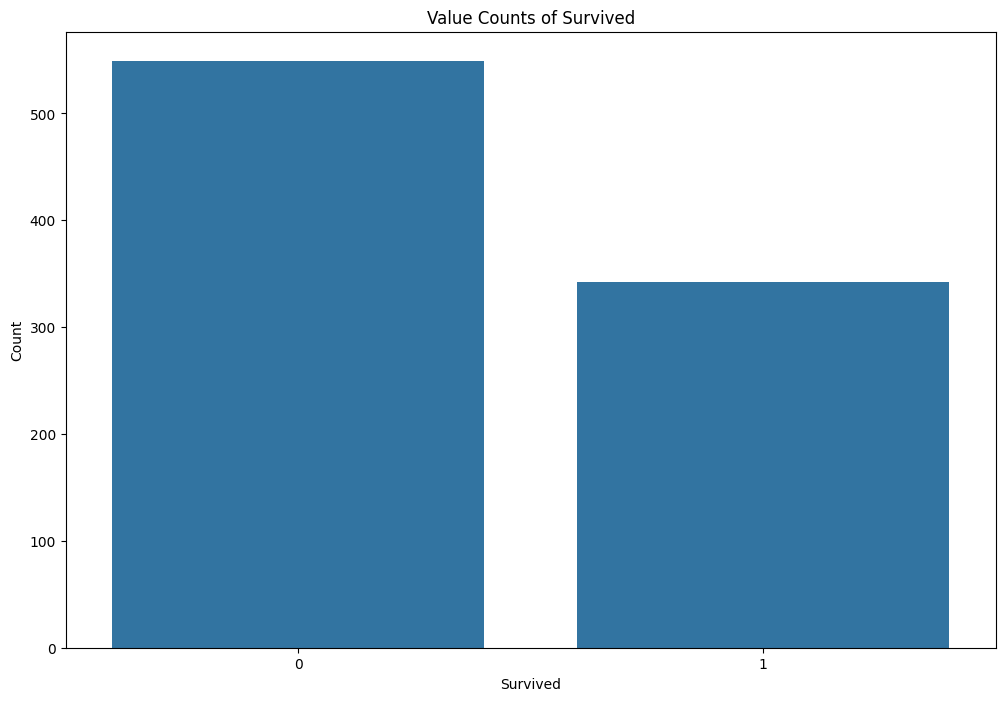

In [5]:
plt.figure(figsize=(12, 8))

sns.barplot(x = df['Survived'].value_counts().index, y = df['Survived'].value_counts())
plt.title('Value Counts of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

<Figure size 1400x800 with 0 Axes>

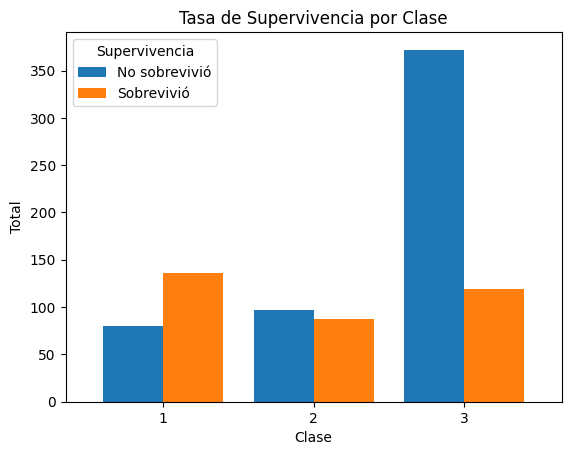

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu dataframe se llama df y contiene:
# 'Pclass'  -> clase del pasajero (1, 2, 3)
# 'Survived' -> 0 = No sobrevivió, 1 = Sobrevivió

# Agrupamos por clase y supervivencia
tasa_supervivencia = df.groupby(['Pclass', 'Survived']).size().unstack()

# Renombrar columnas para la leyenda
tasa_supervivencia.columns = ['No sobrevivió', 'Sobrevivió']

# Crear gráfica
plt.figure(figsize=(14, 8))
tasa_supervivencia.plot(kind='bar', width=0.8)

plt.title('Tasa de Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Total')
plt.legend(title='Supervivencia')
plt.xticks(rotation=0)

plt.show()


<Figure size 1400x800 with 0 Axes>

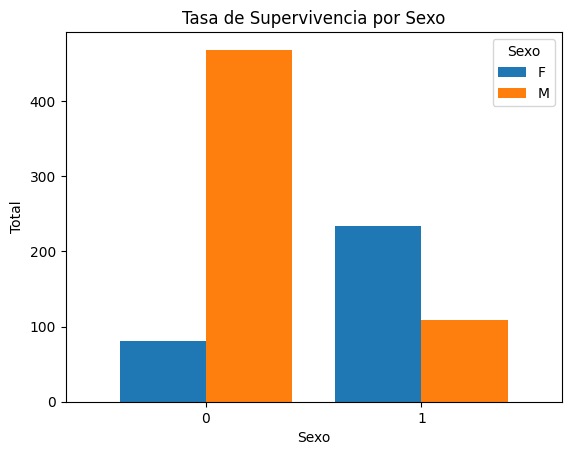

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que en tu DataFrame df:
# 'Survived' → 0 = No sobrevivió, 1 = Sobrevivió
# 'Sex' → 'male', 'female'
# Para igualar tu gráfica, convertir sexo a M/F:
df['Sex2'] = df['Sex'].map({'male': 'M', 'female': 'F'})

# Agrupar y contar por supervivencia y sexo
supervivencia_sexo = df.groupby(['Survived', 'Sex2']).size().unstack()

# Crear gráfica
plt.figure(figsize=(14, 8))
supervivencia_sexo.plot(kind='bar', width=0.8)

plt.title('Tasa de Supervivencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Total')
plt.legend(title='Sexo')
plt.xticks(rotation=0)

plt.show()


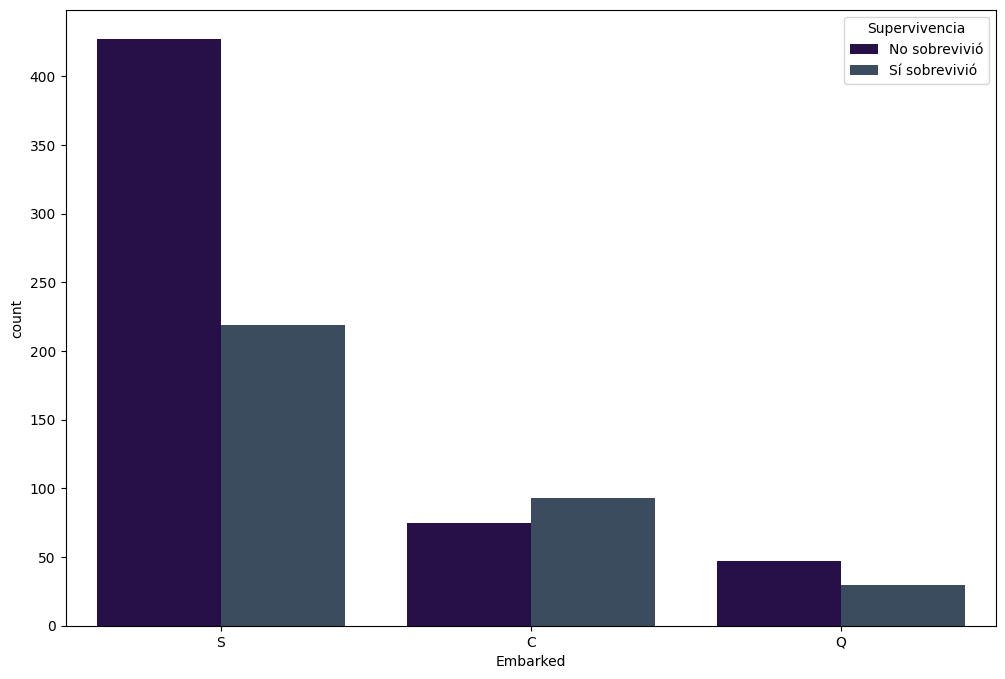

In [8]:
plt.figure(figsize = (12, 8))

# colores para cada una de las clases
color = ['#240750', '#344C64']

sns.countplot(df, x = 'Embarked', hue = 'Survived', palette=color) 
plt.legend(title = 'Supervivencia', labels = ['No sobrevivió', 'Sí sobrevivió'])
plt.show()

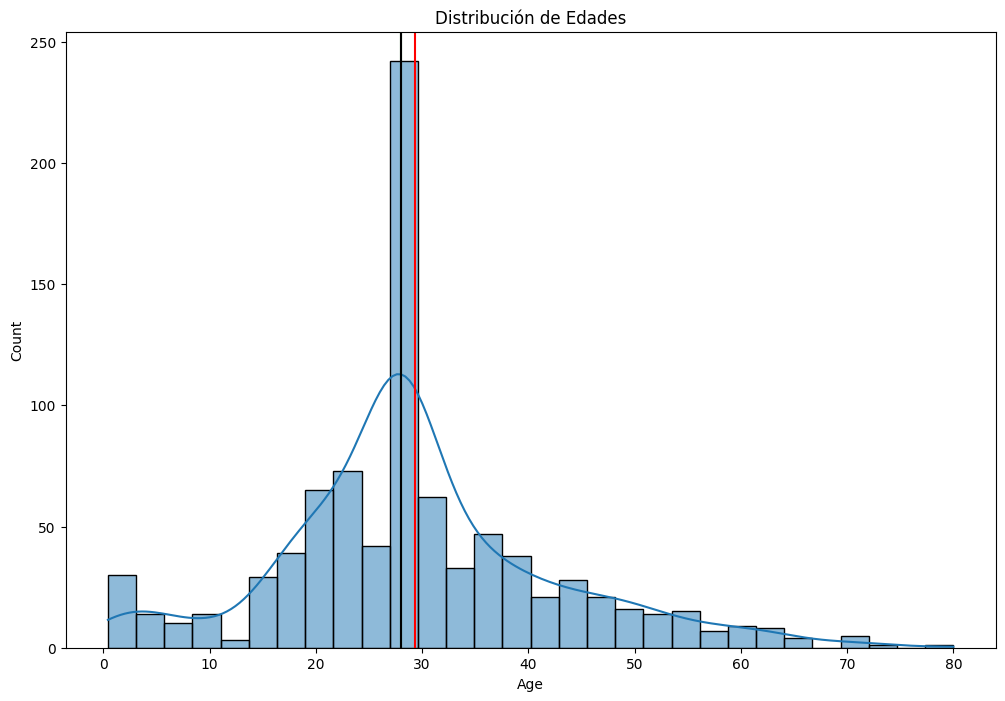

Media: 29.36158249158249
Mediana: 28.0
Moda: 28.0


In [9]:
plt.figure(figsize = (12, 8))

sns.histplot(df, x = 'Age', kde = True)
plt.title('Distribución de Edades')
plt.axvline(df['Age'].mean(), color = 'red')
plt.axvline(df['Age'].median(), color = 'green')
plt.axvline(df['Age'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"Media: {df['Age'].mean()}")
print(f"Mediana: {df['Age'].median()}")
print(f"Moda: {df['Age'].mode()[0]}")

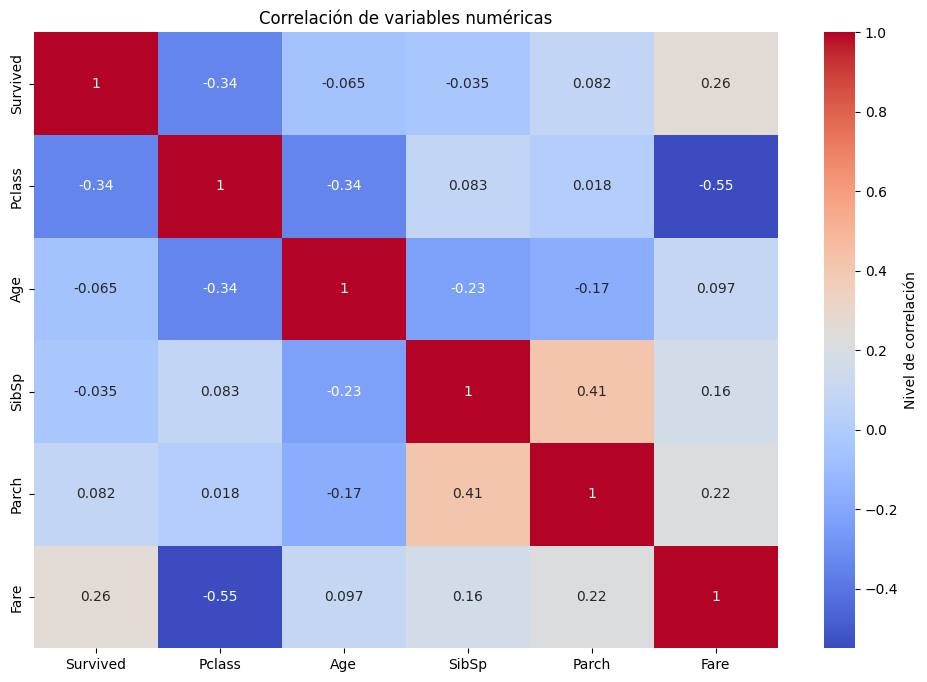

In [10]:
plt.figure(figsize = (12, 8))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), 
            annot=True, 
            cbar=True,  # Activar la barra de colores
            cmap='coolwarm',  # Cambiar la paleta de colores
            cbar_kws={'label': 'Nivel de correlación'})  # Etiqueta para la barra de colores
plt.title('Correlación de variables numéricas')
plt.show()

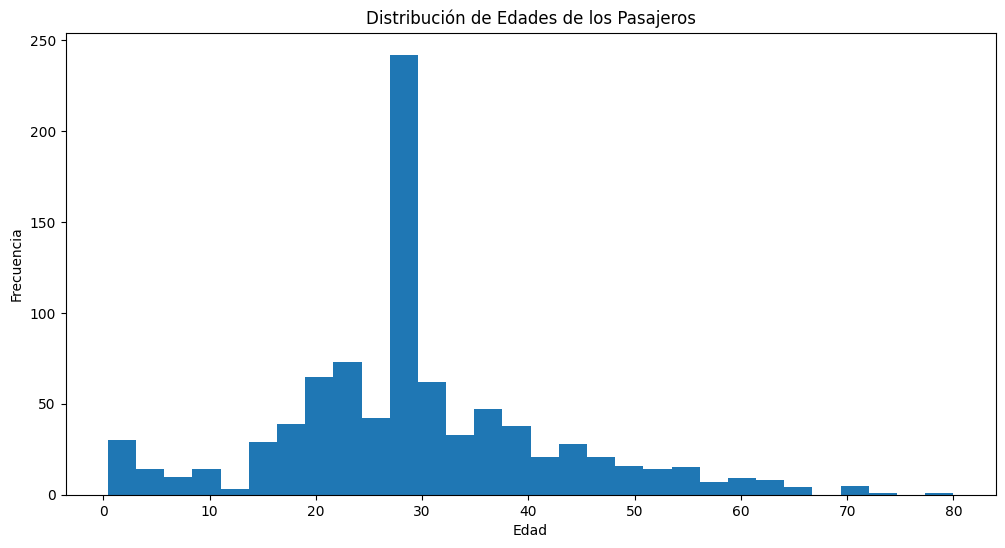

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(df['Age'].dropna(), bins=30)  # dropna() para evitar errores por valores nulos

plt.title('Distribución de Edades de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()


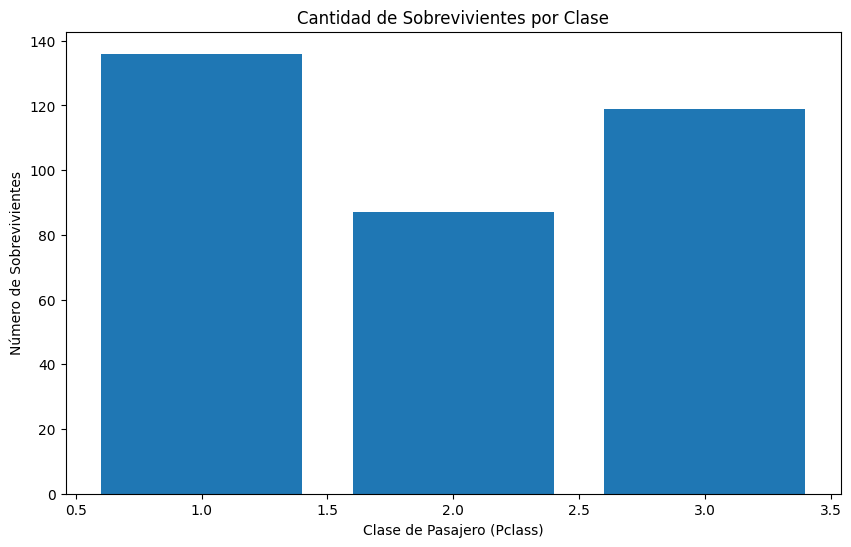

In [12]:
import matplotlib.pyplot as plt

conteo = df.groupby('Pclass')['Survived'].sum()

plt.figure(figsize=(10, 6))
plt.bar(conteo.index, conteo.values)

plt.title('Cantidad de Sobrevivientes por Clase')
plt.xlabel('Clase de Pasajero (Pclass)')
plt.ylabel('Número de Sobrevivientes')

plt.show()


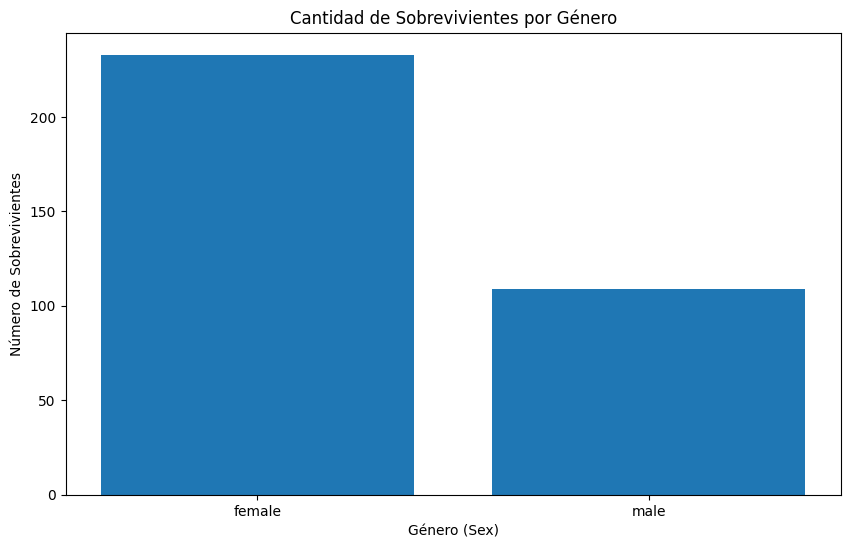

In [13]:
import matplotlib.pyplot as plt

conteo = df.groupby('Sex')['Survived'].sum()

plt.figure(figsize=(10, 6))
plt.bar(conteo.index, conteo.values)

plt.title('Cantidad de Sobrevivientes por Género')
plt.xlabel('Género (Sex)')
plt.ylabel('Número de Sobrevivientes')

plt.show()


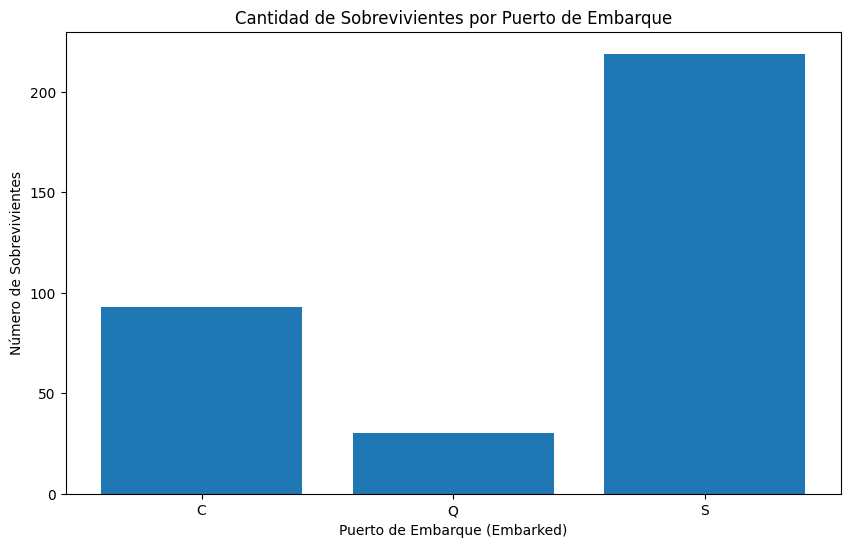

In [14]:
import matplotlib.pyplot as plt

conteo = df.groupby('Embarked')['Survived'].sum()

plt.figure(figsize=(10, 6))
plt.bar(conteo.index, conteo.values)

plt.title('Cantidad de Sobrevivientes por Puerto de Embarque')
plt.xlabel('Puerto de Embarque (Embarked)')
plt.ylabel('Número de Sobrevivientes')

plt.show()


/tmp/ipykernel_9568/3514008206.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa = df.groupby('AgeGroup')['Survived'].mean()


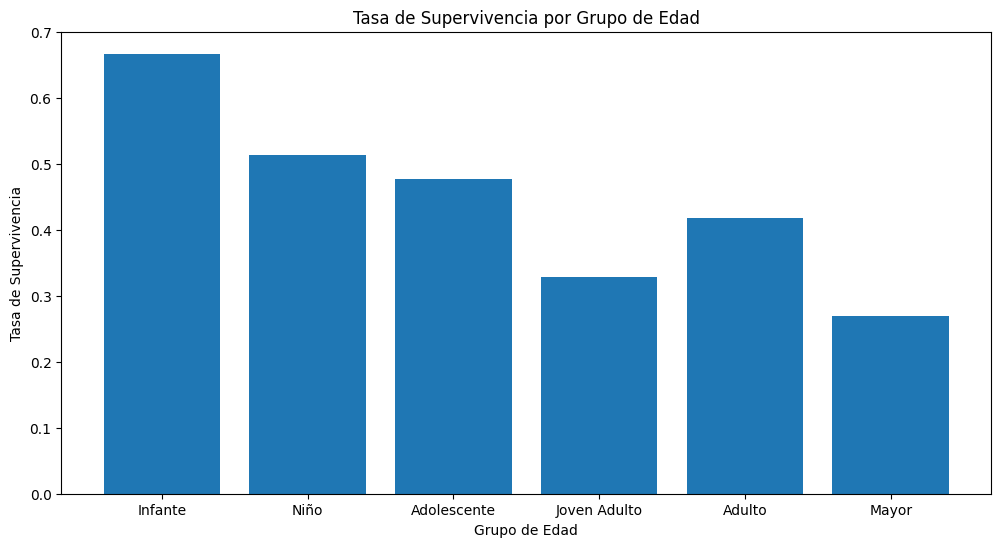

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear categorías de edad
bins = [0, 3, 12, 17, 29, 59, 120]
labels = ['Infante', 'Niño', 'Adolescente', 'Joven Adulto', 'Adulto', 'Mayor']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Calcular tasa de supervivencia por grupo de edad
tasa = df.groupby('AgeGroup')['Survived'].mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(tasa.index, tasa.values)

plt.title('Tasa de Supervivencia por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Supervivencia')

plt.show()


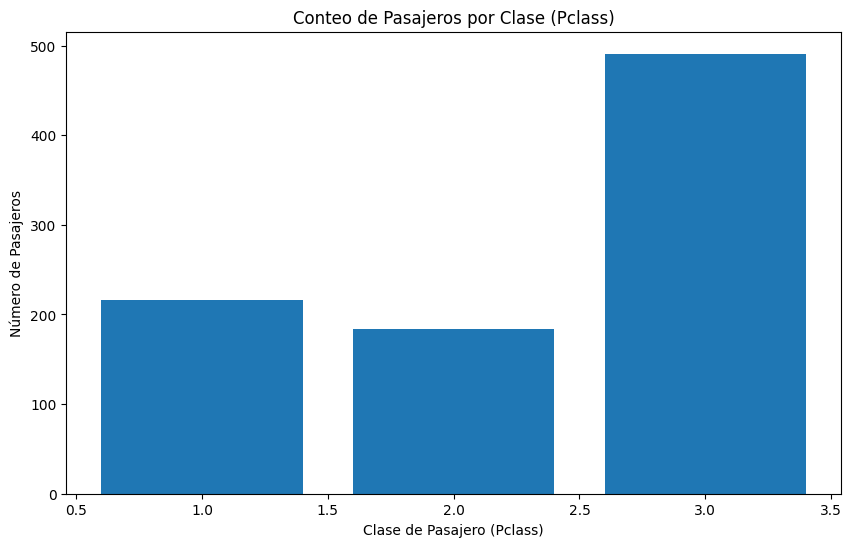

In [16]:
import matplotlib.pyplot as plt

conteo = df['Pclass'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(conteo.index, conteo.values)

plt.title('Conteo de Pasajeros por Clase (Pclass)')
plt.xlabel('Clase de Pasajero (Pclass)')
plt.ylabel('Número de Pasajeros')

plt.show()


<Figure size 1200x600 with 0 Axes>

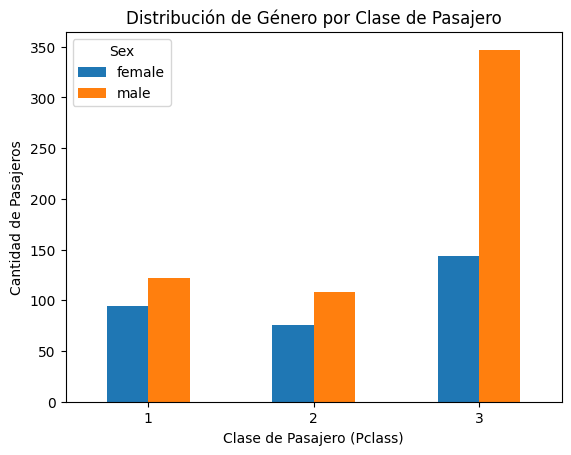

In [17]:
import matplotlib.pyplot as plt

# Contar género por clase
conteo = df.groupby(['Pclass', 'Sex']).size().unstack()

plt.figure(figsize=(12, 6))
conteo.plot(kind='bar')

plt.title('Distribución de Género por Clase de Pasajero')
plt.xlabel('Clase de Pasajero (Pclass)')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks(rotation=0)

plt.show()


<Figure size 1200x600 with 0 Axes>

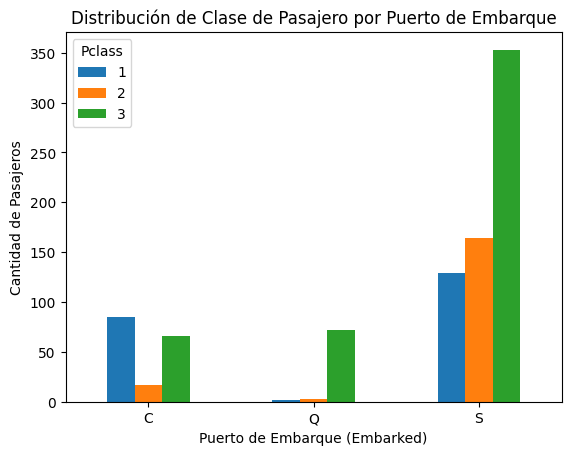

In [18]:
import matplotlib.pyplot as plt

# Contar clases por puerto de embarque
conteo = df.groupby(['Embarked', 'Pclass']).size().unstack()

plt.figure(figsize=(12, 6))
conteo.plot(kind='bar')

plt.title('Distribución de Clase de Pasajero por Puerto de Embarque')
plt.xlabel('Puerto de Embarque (Embarked)')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks(rotation=0)

plt.show()


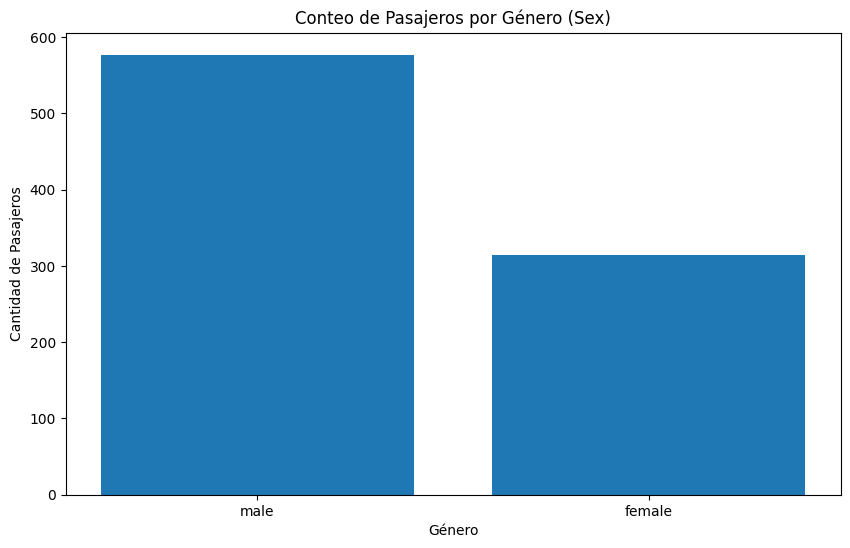

In [19]:
import matplotlib.pyplot as plt

conteo = df['Sex'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(conteo.index, conteo.values)

plt.title('Conteo de Pasajeros por Género (Sex)')
plt.xlabel('Género')
plt.ylabel('Cantidad de Pasajeros')

plt.show()


In [20]:
edad_max = df['Age'].max()
edad_min = df['Age'].min()

print("Edad máxima:", edad_max)
print("Edad mínima:", edad_min)


Edad máxima: 80.0
Edad mínima: 0.42


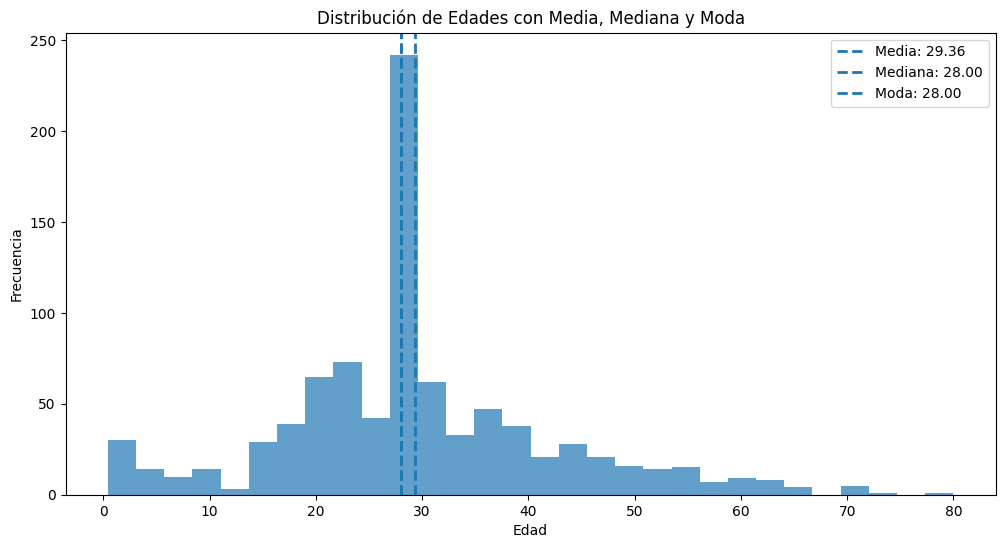

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Eliminar nulos para evitar errores
ages = df['Age'].dropna()

# Calcular estadísticas
media = ages.mean()
mediana = ages.median()
moda = ages.mode()[0]

# Crear histograma
plt.figure(figsize=(12, 6))
plt.hist(ages, bins=30, alpha=0.7)

# Líneas verticales
plt.axvline(media, linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, linestyle='--', linewidth=2, label=f'Moda: {moda:.2f}')

plt.title('Distribución de Edades con Media, Mediana y Moda')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()


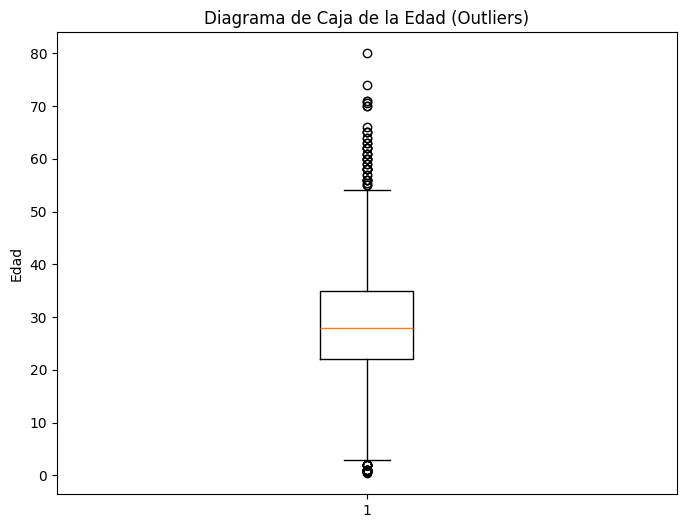

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'].dropna())

plt.title('Diagrama de Caja de la Edad (Outliers)')
plt.ylabel('Edad')

plt.show()


In [23]:
fare_max = df['Fare'].max()
fare_min = df['Fare'].min()

print("Tarifa máxima:", fare_max)
print("Tarifa mínima:", fare_min)



Tarifa máxima: 512.3292
Tarifa mínima: 0.0


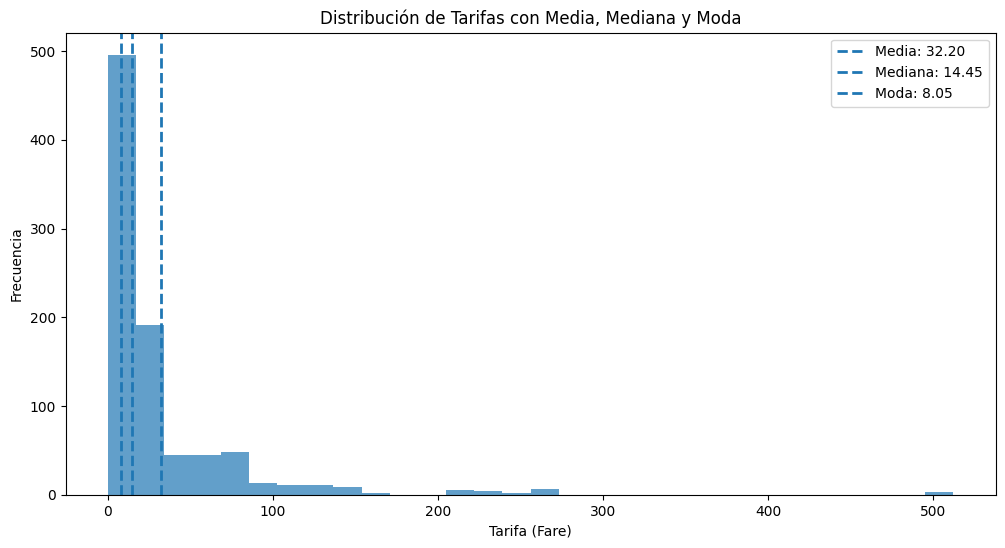

In [24]:
import matplotlib.pyplot as plt

#Eliminar nulos para evitar errores
fares = df['Fare'].dropna()

# Calcular estadísticas
media = fares.mean()
mediana = fares.median()
moda = fares.mode()[0]

# Crear histograma
plt.figure(figsize=(12, 6))
plt.hist(fares, bins=30, alpha=0.7)

# Líneas verticales
plt.axvline(media, linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, linestyle='--', linewidth=2, label=f'Moda: {moda:.2f}')

plt.title('Distribución de Tarifas con Media, Mediana y Moda')
plt.xlabel('Tarifa (Fare)')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()


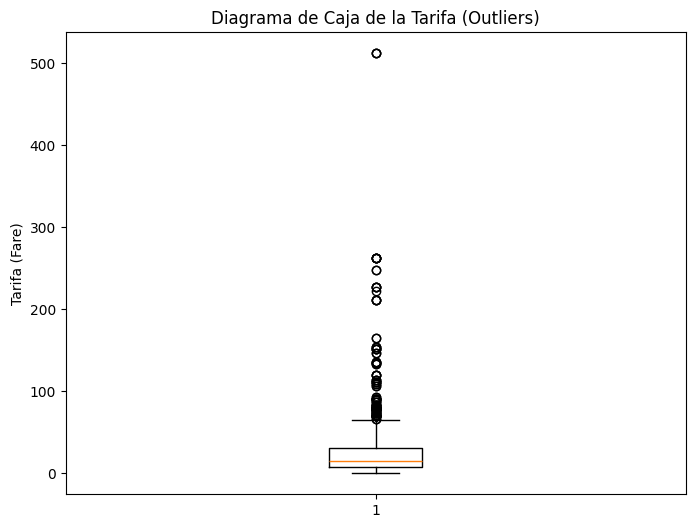

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['Fare'].dropna())

plt.title('Diagrama de Caja de la Tarifa (Outliers)')
plt.ylabel('Tarifa (Fare)')

plt.show()


In [26]:
pasajeros_tarifa_cero = df[df['Fare'] == 0]

print(pasajeros_tarifa_cero)


     Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked Sex2  \
179         0       3  male  36.0      0      0   0.0        S    M   
263         0       1  male  40.0      0      0   0.0        S    M   
271         1       3  male  25.0      0      0   0.0        S    M   
277         0       2  male  28.0      0      0   0.0        S    M   
302         0       3  male  19.0      0      0   0.0        S    M   
413         0       2  male  28.0      0      0   0.0        S    M   
466         0       2  male  28.0      0      0   0.0        S    M   
481         0       2  male  28.0      0      0   0.0        S    M   
597         0       3  male  49.0      0      0   0.0        S    M   
633         0       1  male  28.0      0      0   0.0        S    M   
674         0       2  male  28.0      0      0   0.0        S    M   
732         0       2  male  28.0      0      0   0.0        S    M   
806         0       1  male  39.0      0      0   0.0        S    M   
815   

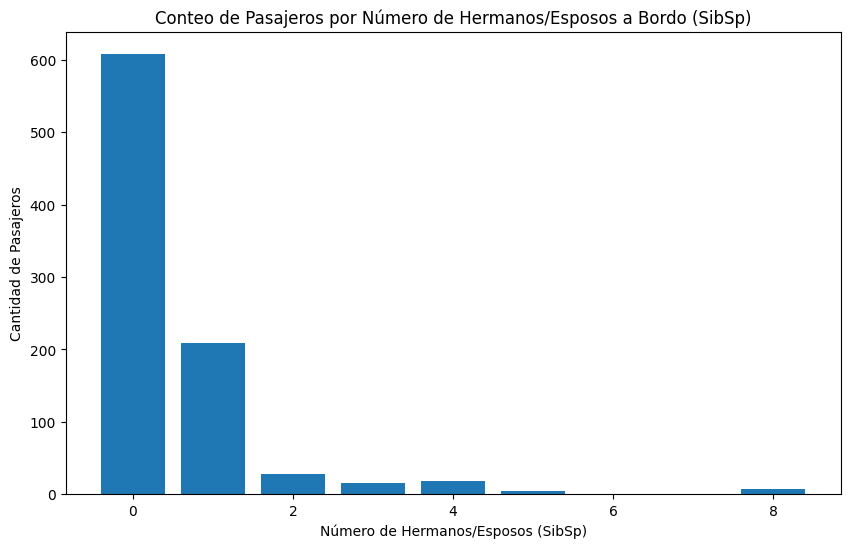

In [27]:
import matplotlib.pyplot as plt

conteo = df['SibSp'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(conteo.index, conteo.values)

plt.title('Conteo de Pasajeros por Número de Hermanos/Esposos a Bordo (SibSp)')
plt.xlabel('Número de Hermanos/Esposos (SibSp)')
plt.ylabel('Cantidad de Pasajeros')

plt.show()


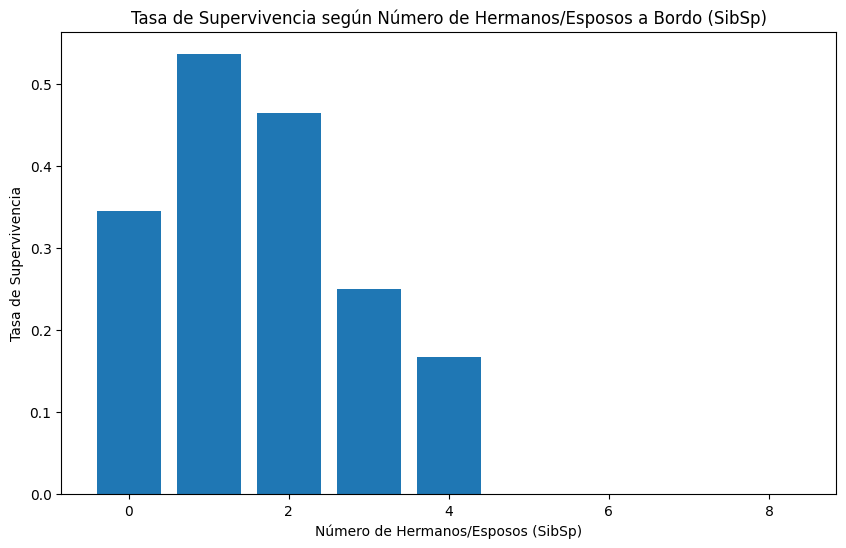

In [28]:
import matplotlib.pyplot as plt

tasa = df.groupby('SibSp')['Survived'].mean()

plt.figure(figsize=(10, 6))
plt.bar(tasa.index, tasa.values)

plt.title('Tasa de Supervivencia según Número de Hermanos/Esposos a Bordo (SibSp)')
plt.xlabel('Número de Hermanos/Esposos (SibSp)')
plt.ylabel('Tasa de Supervivencia')

plt.show()


In [29]:
porcentaje = df.groupby('SibSp')['Survived'].mean() * 100

print(porcentaje)


SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64


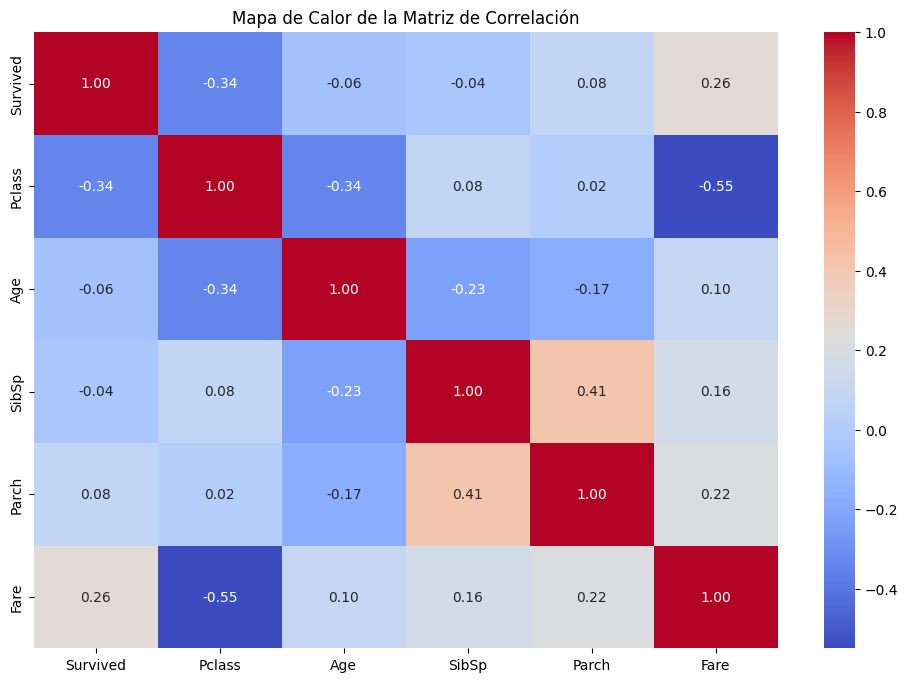

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas
corr = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()
